In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Veri setinin eklenmesi ve incelenmesi**

In [23]:

# Veriyi yükleme
df = pd.read_csv('sample_data/car_price_dataset.csv')

# Veri setinin ilk 5 satırını görüntüleme
print("## Veri Setinin İlk 5 Satırı")
display(df.head())

# Veri hakkında genel bilgi
print("\n## Veri Setinin Bilgisi")
df.info()

# Eksik verileri kontrol etme
print("\n## Eksik Veriler")
print(df.isnull().sum())

# Temel istatistikler
print("\n## Temel İstatistikler")
print(df.describe())




## Veri Setinin İlk 5 Satırı

## Veri Setinin Bilgisi
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB

## Eksik Veriler

## Temel İstatistikler
               Year   Engine_Size        Mileage         Doors   Owner_Count  \
count  10000.000000  10000.000000   10000.000000  10000.000000  10000.000000   
mean    2011.543700      3.000560  149239.111800      3.

# **Araç Fiyatlarının Dağılımı**

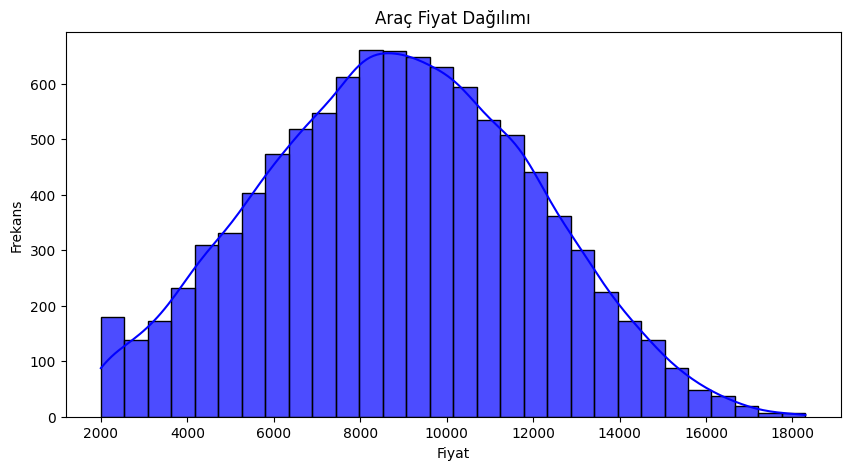

In [24]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=30, kde=True, color='blue', alpha=0.7)
plt.xlabel('Fiyat')
plt.ylabel('Frekans')
plt.title('Araç Fiyat Dağılımı')
plt.show()


# **Araçların Yıl Bazında Dağılımı**

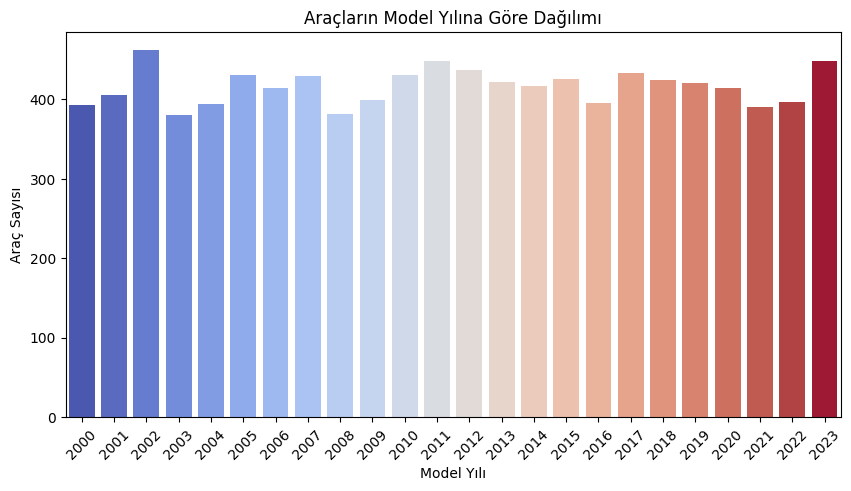

In [44]:
if 'Year' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x='Year', data=df, hue='Year', palette='coolwarm', order=sorted(df['Year'].unique()), legend=False)
    plt.xlabel('Model Yılı')
    plt.ylabel('Araç Sayısı')
    plt.title('Araçların Model Yılına Göre Dağılımı')
    plt.xticks(rotation=45)
    plt.show()

# **Fiyat-Kilometre İlişkisi**

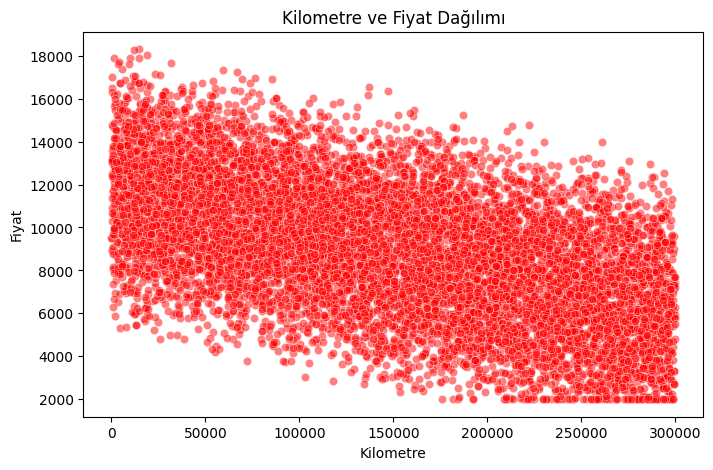

In [29]:
if 'Mileage' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='Mileage', y='Price', data=df, alpha=0.5, color='red')
    plt.xlabel('Kilometre')
    plt.ylabel('Fiyat')
    plt.title('Kilometre ve Fiyat Dağılımı')
    plt.show()

# **Yakıt Türüne Göre Araç Fiyat Dağılımı**

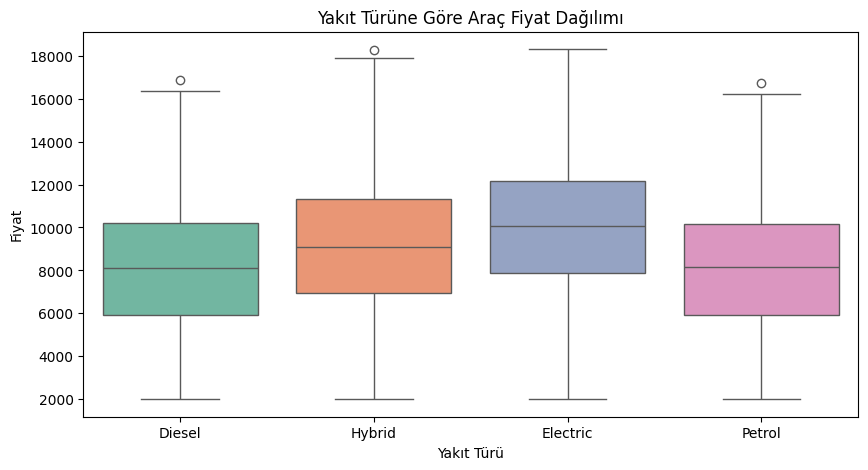

In [45]:
if 'Fuel_Type' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Fuel_Type', y='Price', data=df, hue='Fuel_Type', palette='Set2', dodge=False)
    plt.xlabel('Yakıt Türü')
    plt.ylabel('Fiyat')
    plt.title('Yakıt Türüne Göre Araç Fiyat Dağılımı')
    plt.show()

# **Vites Tipine Göre Araç Sayısı**

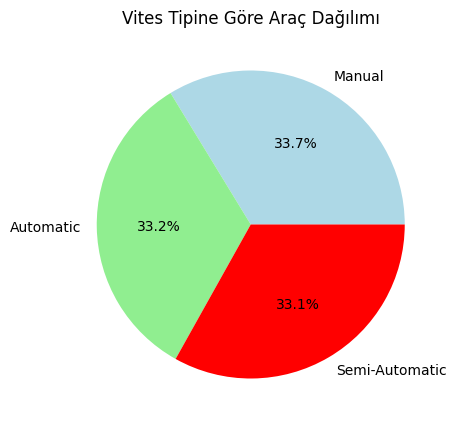

In [31]:
if 'Transmission' in df.columns:
    plt.figure(figsize=(10, 5))
    df['Transmission'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'red'])
    plt.ylabel('')
    plt.title('Vites Tipine Göre Araç Dağılımı')
    plt.show()

# **Marka Bazında Ortalama Fiyatlar**

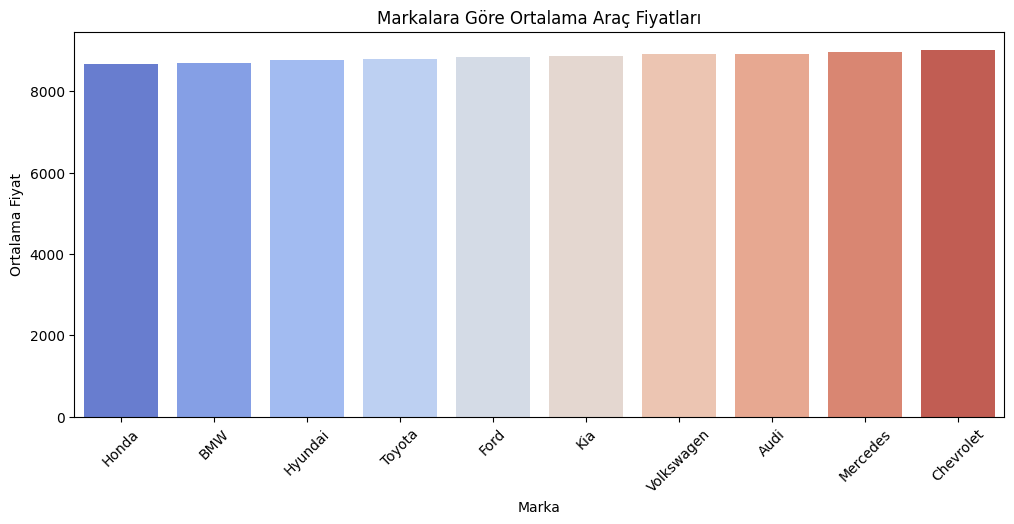

In [48]:
if 'Brand' in df.columns:
    plt.figure(figsize=(12, 5))
    sns.barplot(x=df.groupby('Brand')['Price'].mean().sort_values().index,
            y=df.groupby('Brand')['Price'].mean().sort_values().values,
            hue=df.groupby('Brand')['Price'].mean().sort_values().index,
            palette='coolwarm',
            dodge=False)
    plt.xlabel('Marka')
    plt.ylabel('Ortalama Fiyat')
    plt.title('Markalara Göre Ortalama Araç Fiyatları')
    plt.xticks(rotation=45)
    plt.show()

#  **Model Yılı ve Fiyat Arasındaki Eğilim Çizgisi**

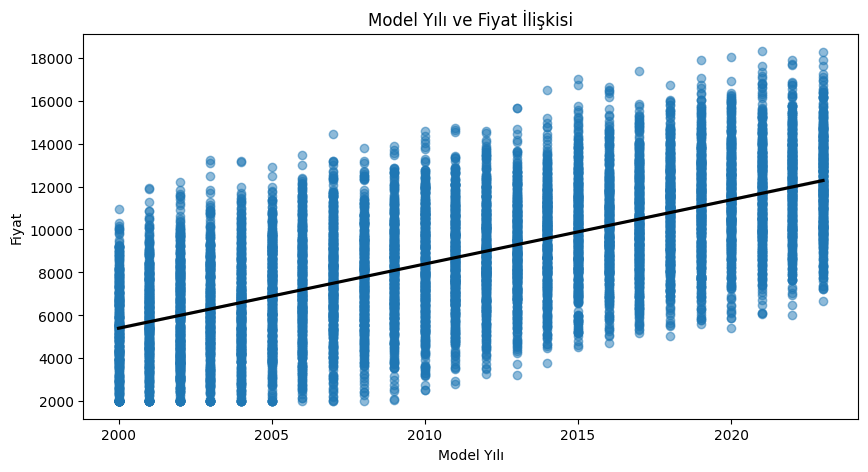

In [33]:
if 'Year' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.regplot(x='Year', y='Price', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'black'})
    plt.xlabel('Model Yılı')
    plt.ylabel('Fiyat')
    plt.title('Model Yılı ve Fiyat İlişkisi')
    plt.show()

# **Marka ve Model Bazında Ortalama Fiyat Analizi**

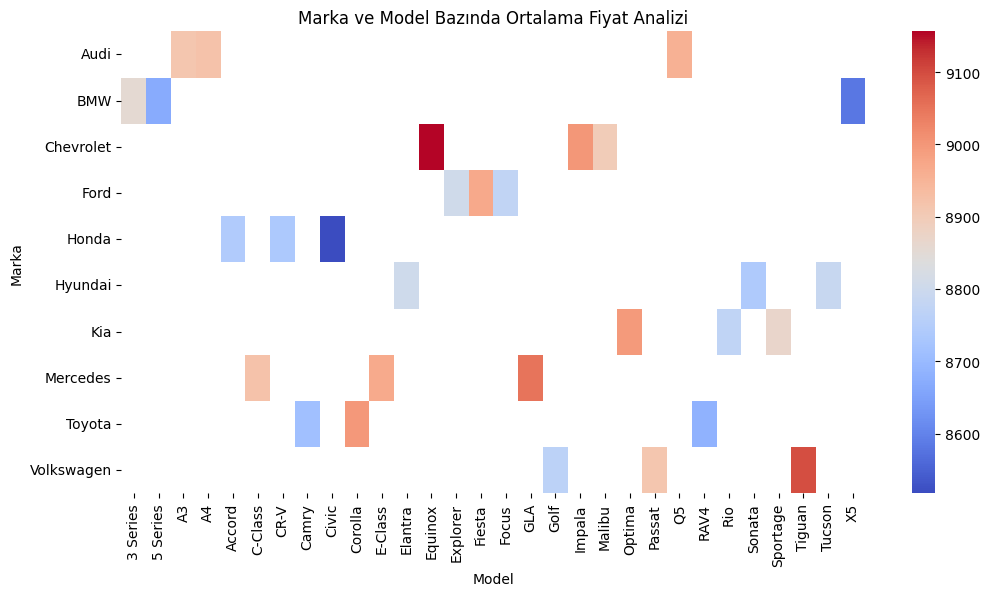

In [40]:
if 'Brand' in df.columns and 'Model' in df.columns:
    brand_model_avg_price = df.groupby(['Brand', 'Model'])['Price'].mean().unstack()
    plt.figure(figsize=(12, 6))
    sns.heatmap(brand_model_avg_price, cmap='coolwarm', annot=False)
    plt.title('Marka ve Model Bazında Ortalama Fiyat Analizi')
    plt.xlabel('Model')
    plt.ylabel('Marka')
    plt.show()

# **Çok Değişkenli Analiz: Yakıt Türü, Vites Tipi ve Fiyat (Stripplot)**

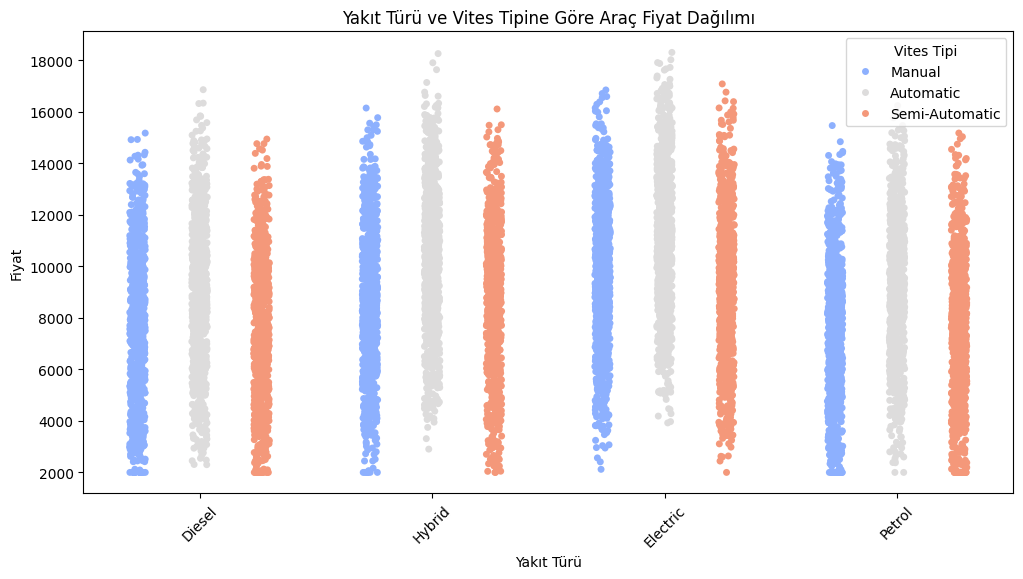

In [43]:
if 'Fuel_Type' in df.columns and 'Transmission' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.stripplot(x='Fuel_Type', y='Price', hue='Transmission', data=df, palette='coolwarm', jitter=True, dodge=True)
    plt.xlabel('Yakıt Türü')
    plt.ylabel('Fiyat')
    plt.title('Yakıt Türü ve Vites Tipine Göre Araç Fiyat Dağılımı')
    plt.xticks(rotation=45)
    plt.legend(title='Vites Tipi')
    plt.show()